# Устранение выбросов

## Что мы изучим на этом занятии

* Устранение выбросов
    * Метод z-оценок
    * Метод межквартильного размаха (IQR)

## Устранение выбросов

Выбросы и аномалии в данных могут существенно влиять на анализ и моделирование, поэтому их обнаружение является важной задачей. Существует множество методов для определения выбросов и аномалий, которые зависят от типа данных и задач анализа. Вот основные методы:

1. Статистические методы:
   - Метод z-оценок (z-scores)
   - Метод межквартильного размаха (IQR)

2. Методы машинного обучения:
   - Isolation Forest
   - One-Class SVM

3. Методы на основе кластеризации:
   - DBSCAN  

Пока что мы рассмотрим только статистические методы: **метод z-оценок** и **метод межквартильного размаха**

### Метод z-оценок

#### Z-оценка

**Определение**

Z-оценка (или стандартный балл) — это мера, показывающая, на сколько стандартных отклонений (сигм) значение случайной величины отклоняется от её среднего значения. Она позволяет нормализовать значения, что делает их сравнимыми между собой, даже если они принадлежат к разным распределениям.

**Формула**

Для вычисления z-оценки используется следующая формула:

$$
z = \frac{X - \mu}{\sigma}
$$

где:
- $ X $ — значение случайной величины,
- $ \mu $ — среднее значение (математическое ожидание) распределения,
- $ \sigma $— стандартное отклонение распределения.

**Интерпретация**

1. **Z-оценка 0**: Значение равно среднему.
2. **Положительная z-оценка**: Значение выше среднего.
3. **Отрицательная z-оценка**: Значение ниже среднего.
4. **Абсолютное значение z-оценки**: Показывает, насколько далеко значение от среднего в единицах стандартных отклонений.

**Пример**

Допустим, у нас есть набор данных о росте людей, и средний рост составляет 170 см со стандартным отклонением 10 см. Если у человека рост 180 см, его z-оценка будет:

$$
z = \frac{180 - 170}{10} = 1
$$

Это означает, что рост данного человека на одно стандартное отклонение выше среднего роста в данной группе.

#### Алгоритм метода z-оценок

1. Расчет среднего значения и стандартного отклонения

2. Вычисление z-оценки для каждого значения

3. Определение порога для выбросов:
   - Обычно значения, у которых абсолютная z-оценка превышает определенный порог, считаются выбросами. Стандартные пороги:
     - |z| > 3: Строгий критерий, который определяет значения, которые находятся более чем на 3 стандартных отклонения от среднего, как выбросы.
     - |z| > 2: Менее строгий критерий, используемый в некоторых случаях.


#### Почему этот метод работает?

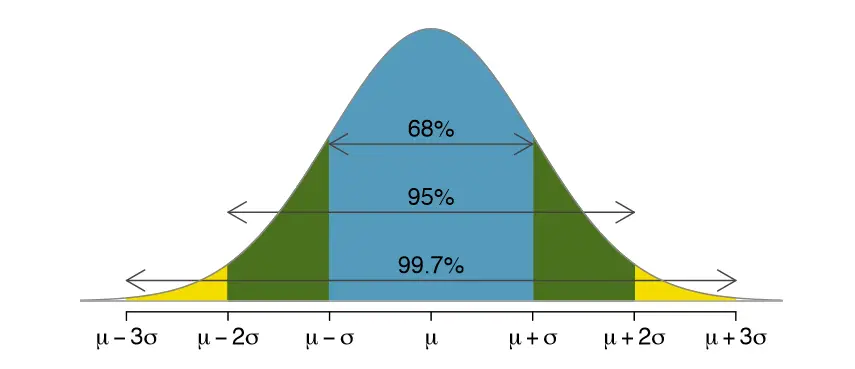

Метод z-оценок определяет выбросы как значения, которые сильно отдалены от среднего значения. Здесь приходит на помощь стандартное отклонение, которое измеряет разброс данных относительно среднего. Чем больше значение стандартного отклонения, тем больше разброс данных. Использование z-оценок позволяет стандартизировать этот разброс и выразить его в виде количества стандартных отклонений от среднего.

#### Определение выбросов методом z-оценок на практике

Давайте используем датасет `tips` из библиотеки Seaborn и определим выбросы с помощью метода z-оценок. Этот датасет содержит информацию о чаевых, оставленных в ресторане, и мы будем искать выбросы в столбце `total_bill`.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка датасета
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Рассчитываем z-оценки для столбца 'total_bill'
z_scores = stats.zscore(data['total_bill'])

# Определяем порог для выбросов
threshold = 3

# Находим выбросы
outliers = np.abs(z_scores) > threshold

# Выводим выбросы
outliers_data = data[outliers]

print("Выбросы в столбце 'total_bill':")
print(outliers_data)

Выбросы в столбце 'total_bill':
     total_bill    tip   sex smoker  day    time  size
59        48.27   6.73  Male     No  Sat  Dinner     4
156       48.17   5.00  Male     No  Sun  Dinner     6
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4


Мы определили выбросы: это 4 записи, в которых `total_bill` находится в районе пятидесяти. Давайте посмотрим на как это выглядит на гистограмме

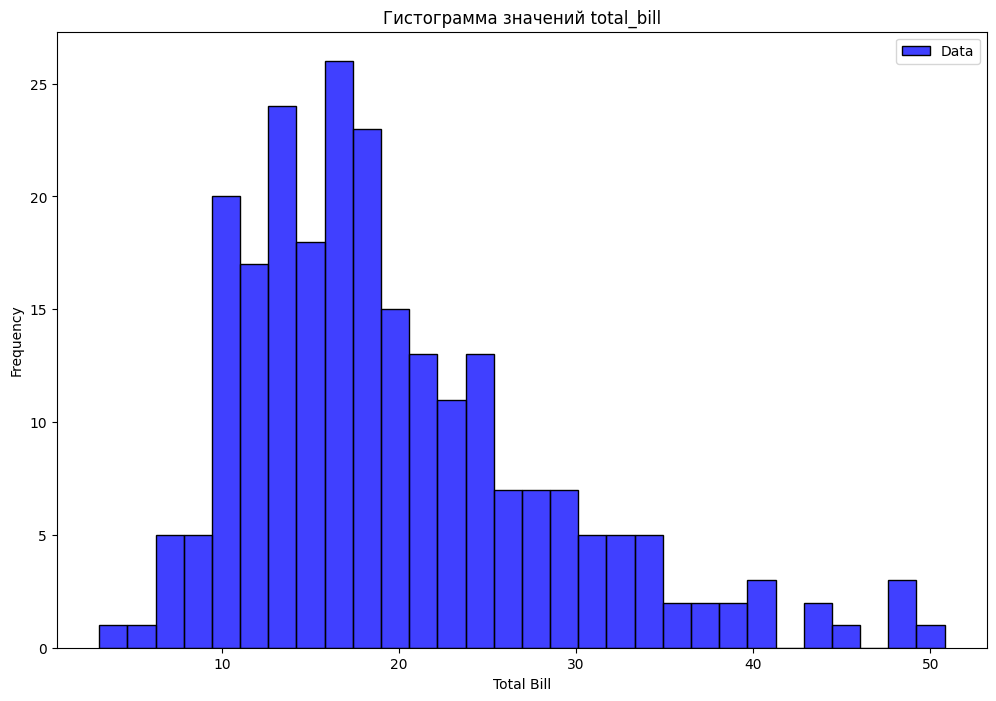

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных на гистограмме
plt.figure(figsize=(12, 8))
sns.histplot(data['total_bill'], bins=30, color='blue', label='Data')

plt.title('Гистограмма значений total_bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.legend()
plt.show()

На гистограмме мы можем видеть, что значения, близкие к 50, находятся вдали от большинства значений. Таким образом, мы можем сказать, что эти отдалённые значения являются выбросами

### Метод межквартильного размаха (IQR)

#### Квартили

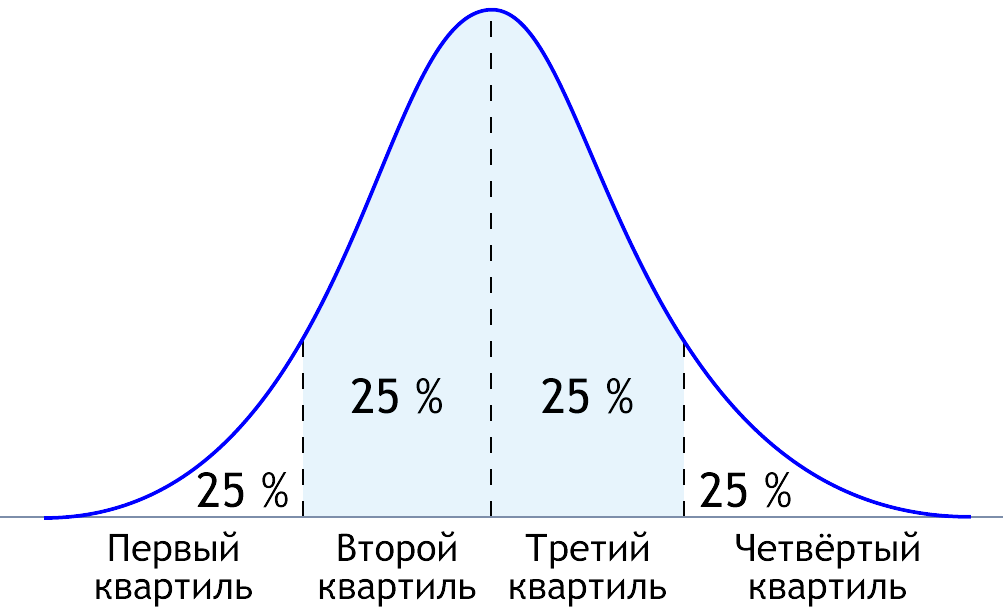

Источник: https://cdn.oblakoz.ru//IMUMKContent/696110/content/419693/508002.png

Квартиль — это статистическая мера, которая делит упорядоченный набор данных на четыре равные части. В общей сложности есть три квартиля, которые помогают описать распределение данных.

1. **Первый квартиль (Q1)**: Это значение, ниже которого находится 25% данных. Иначе говоря, 25% данных меньше или равны этому значению.

2. **Второй квартиль (Q2)**: Это медиана набора данных, то есть значение, которое делит данные на две равные половины. 50% данных находятся ниже или равны этому значению.

3. **Третий квартиль (Q3)**: Это значение, ниже которого находится 75% данных. Таким образом, 75% данных меньше или равны этому значению.



#### Алгоритм

Квартильные разности, такие как интерквартильный размах (разница между третьим и первым квартилем), часто используются для оценки разброса и вариативности данных.

1. Вычислите квартильные значения:
   - Первый квартиль (Q1): значение, ниже которого находится 25% данных.
   - Третий квартиль (Q3): значение, ниже которого находится 75% данных.

2. Вычислите межквартильный размах (IQR):
   $$ \text{IQR} = Q3 - Q1 $$

3. Определите границы для выбросов:
   - Нижняя граница для выбросов: $ Q1 - 1.5 \times \text{IQR} $
   - Верхняя граница для выбросов: $ Q3 + 1.5 \times \text{IQR} $

4. Идентифицируйте выбросы:
    
    Значения, которые находятся ниже нижней границы или выше верхней границы, считаются выбросами.


#### Почему этот метод работает?



Этот метод использует подход для определения выбросов, похожий на метод z-оценок: он определяет выбросы как значения, которые сильно отдалены от большинства. Для этого он использует квартили, которые показывают сколько процентов данных за ними находится

#### Определение выбросов методом межквартильного размаха на практике

Попробуем определить выбросы на тех же данных, только уже другим методом: методом межквартильного размаха

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка датасета
data = sns.load_dataset("tips")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Рассчитываем квартильные значения и IQR
Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = (data['total_bill'] < lower_bound) | (data['total_bill'] > upper_bound)
outliers_data = data[outliers]

print("Выбросы в столбце 'total_bill':")
print(outliers_data)

Выбросы в столбце 'total_bill':
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4


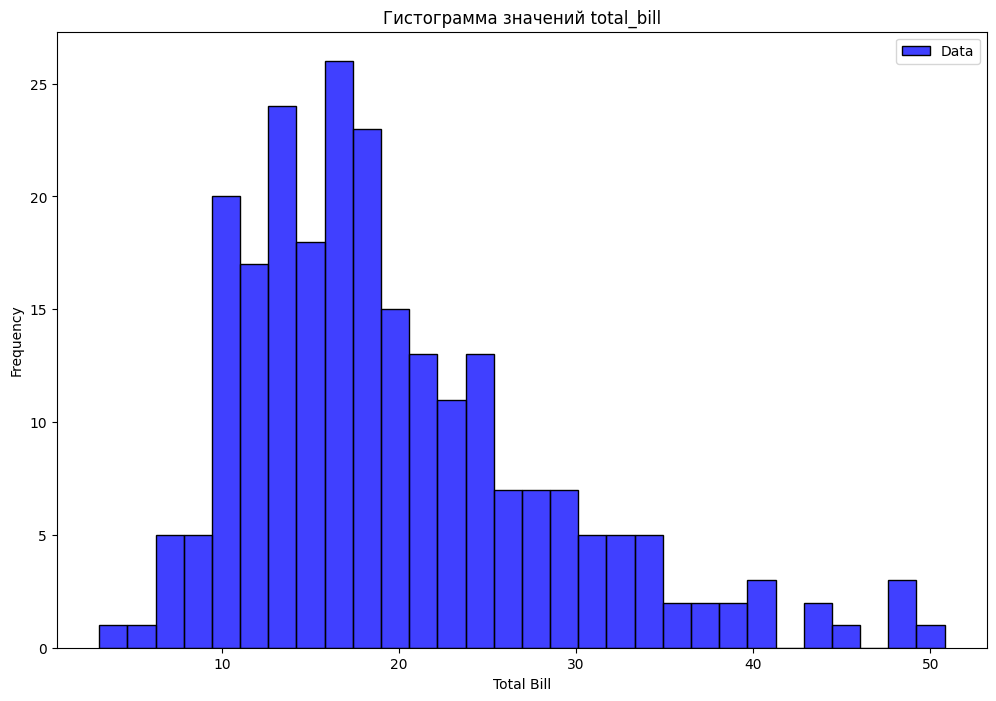

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных на гистограмме
plt.figure(figsize=(12, 8))
sns.histplot(data['total_bill'], bins=30, color='blue', label='Data')

plt.title('Гистограмма значений total_bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Из гистограммы видно, что действительно можно считать, что значения больше 40 будут выбросами.

## Упражнение 1: Метод z-оценки

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Загрузим датасет `titanic`, чтобы проанализировать выбросы в колонке `age`

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Загрузка датасета Titanic
df = sns.load_dataset('titanic')
df

In [ ]:
# Выбираем столбец для анализа, например, 'age'
data = df['age'].dropna()

# Вычисляем среднее и стандартное отклонение
mean = ...
std_dev = ...

# Вычисляем z-оценки по формуле
z_scores = ...

# Определяем порог для z-оценки
threshold = 3

print(f'Среднее значение: {mean}')
print(f'Стандартное отклонение: {std_dev}')
print(f'Порог z-оценки для определения выбросов: {threshold}')

Находим выбросы

In [ ]:
# Идентифицируем выбросы
outliers = ....

print(f'Количество выбросов: {outliers.count()}')
print(f'Выбросы:\n{outliers}')

## Упражнение 2: Метод межквартильного размаха

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше*

Загрузим датасет `titanic`, чтобы проанализировать выбросы в колонке `age`

In [ ]:
import seaborn as sns
import pandas as pd

# Загрузка датасета Titanic
df = sns.load_dataset('titanic')
df

Вычислим границы

In [ ]:
# Выбираем столбец для анализа, например, 'age'
data = df['age'].dropna()

# Вычисляем первый и третий квартиль
Q1 = ...
Q3 = ...

# Вычисляем межквартильный размах (IQR)
IQR = ...

# Определяем границы для выбросов
lower_bound = ...
upper_bound = ...

print(f'Первый квартиль (Q1): {Q1}')
print(f'Tретий квартиль (Q3): {Q3}')
print(f'Межквартильный размах (IQR): {IQR}')
print(f'Нижняя граница для выбросов: {lower_bound}')
print(f'Верхняя граница для выбросов: {upper_bound}')

Определим выбросы

In [ ]:
# Идентифицируем выбросы
outliers = ...

print(f'Количество выбросов: {outliers.count()}')
print(f'Выбросы:\n{outliers}')

## Заключение

В этом занятии мы рассмотрели важный аспект предобработки данных: устранение выбросов.

Мы обсудили два статистических метода для определения и устранения выбросов:
- **Метод z-оценок**: Этот метод использует стандартное отклонение для определения того, насколько сильно значение отличается от среднего. Мы рассмотрели, как вычислить z-оценки и определить выбросы на основе установленного порога.
- **Метод межквартильного размаха (IQR)**: Мы изучили, как вычислить квартильные значения и IQR, чтобы определить границы для выбросов. Значения, которые выходят за пределы этих границ, считаются выбросами.

Оба метода предоставляют эффективные способы для выявления аномальных значений в данных. Метод z-оценок полезен для данных, которые приблизительно нормально распределены, тогда как метод IQR может быть более устойчивым к различным распределениям и менее чувствителен к выбросам.